In [1]:
from gum import *

In [2]:
%config InlineBackend.figure_format = 'svg'

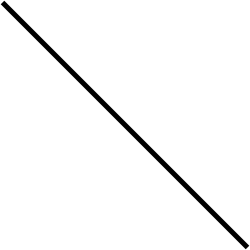

In [3]:
Line(stroke_width=5)

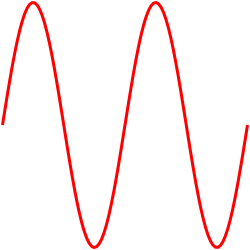

In [4]:
SymPath(np.sin, xlim=(0, 4*np.pi), stroke_width=3, stroke='red')

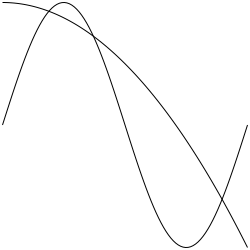

In [5]:
xlim = (0, 2*np.pi)
line1 = SymPath(np.sin, xlim=xlim)
line2 = SymPath(lambda x: -0.05*x**2, xlim=xlim)
line1 + line2

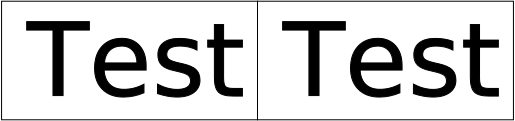

In [6]:
t = Node('Test')
t | t

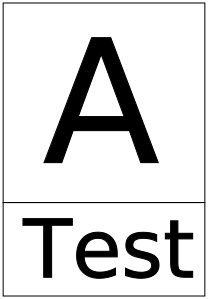

In [7]:
t1 = Node(text='A')
t2 = Node(text='Test')
t1 & t2

### Text Debug

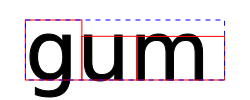

In [8]:
text = TextDebug(text='gum')
logo = Frame(text, padding=(0.1, 0.2))
s = SVG(logo, size=(250, 100))
s.save('gum.svg')
s

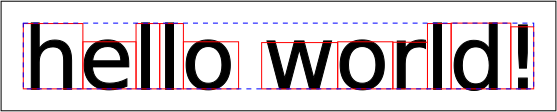

In [9]:
hello = TextDebug(text='hello world!')
s = Frame(hello, padding=(0.04, 0.2), border=1)
s.save('test/hello.svg')
s

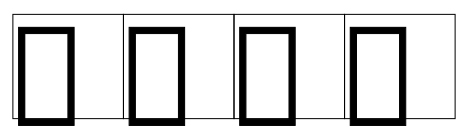

In [10]:
squares = list('🦊🍄🗻⬜')
squares = [Emoji(text=s) for s in squares]
squares = [Frame(s, border=1) for s in squares]
s = Frame(HStack(squares), margin=0.1)
s.save('test/emoji.svg')
s

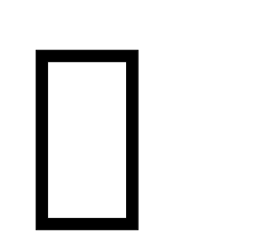

In [11]:
Frame(Emoji('🍄'), margin=0.1)

### Font Shaping

In [12]:
from gi.repository import HarfBuzz as hb

In [13]:
font, infos, positions, extents = get_text_shape('🗻', font='Noto Emoji', debug=True)

In [14]:
ext = extents[0].extents
print(ext.width, -ext.height)
print(ext.x_bearing, ext.y_bearing)

2555 2405
0 1898


In [15]:
pos = positions[0]
print(pos.x_offset, pos.y_offset)
print(pos.x_advance, pos.y_advance)

0 0
2550 0


### Layout

In [16]:
na = Node(text='A', pad=0.2)
nt = Node(text='Test', pad=0.2)
b = Bullet()

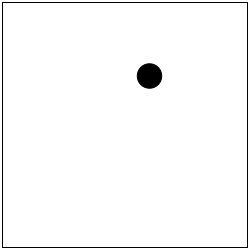

In [17]:
Point(b, x=0.6, y=0.3, r=0.05) + Rect()

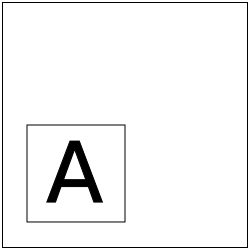

In [18]:
Point(na, x=0.3, y=0.7, r=0.2) + Rect()

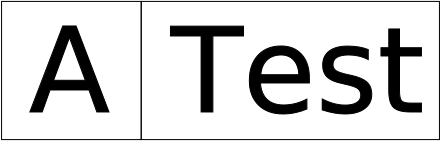

In [19]:
na | nt

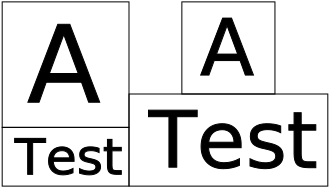

In [20]:
VStack([na, nt], expand=True) | VStack([na, nt], expand=False)

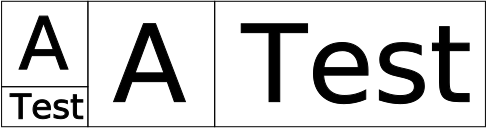

In [21]:
(na & nt) | (na | nt)

### Plots

In [22]:
ticks = {0.15: 'hello', 0.35: '0.3', 0.5: 'abc', 0.8: 'world'}

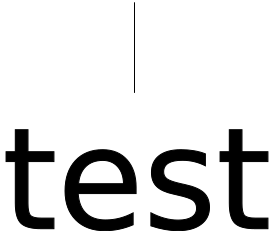

In [23]:
VTick('test')

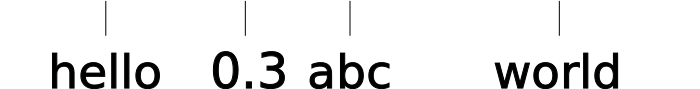

In [24]:
HScale(ticks)

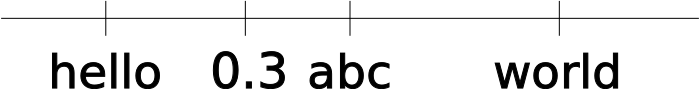

In [25]:
HAxis(ticks)

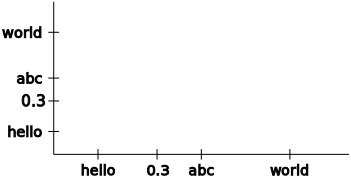

In [26]:
Axes(xticks=ticks, yticks=ticks, aspect=2)

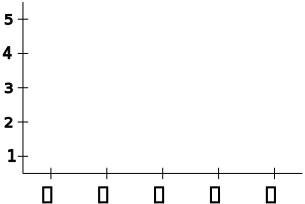

In [27]:
Axes(
    xticks={0.1: Emoji('🍄'), 0.3: Emoji('🍩'), 0.5: Emoji('🚀'), 0.7: Emoji('🦊'), 0.9: Emoji('🐋')},
    yticks={0.1: '1', 0.3: '2', 0.5: '3', 0.7: '4', 0.9: '5'},
    aspect=1.5, xaxis_tick_text_scale=1.5
)